# **OS e File I/O**

Nell'ambito dell'informatica, svolgono un ruolo fondamentale i file cosiddetti _Plain Text_. Si tratta di file di testo costituiti esclusivamente dai caratteri rappresentati con codifica ASCII, UTF-8, ecc. A differenza dei file testuali prodotti, ad esempio, con un _word processor_ come _MS Word_, non contengono caratteri di formattazione. Questi file di testo costituiscono, per citare alcuni esempi, file di configurazione del sistema, file di log e, in ambito bioinformatico, file contenenti sequenze e/o annotazioni.

È chiaro dunque come sia utile accedere, leggere e modificare file testuali in maniera **programmatica**, utilizzando gli strumenti che ci vengono messi a disposizione dai linguaggi di programmazione. In questa lezione, vedremo come sia possibile svolgere queste operazioni in Python. I due elementi principali della lezione sono:

- **File I/O**: metodi e funzioni per l'accesso programmatico ai file testuali;

- **Il modulo OS**: una raccolta di metodi e funzioni per la gestione del **filesystem** del sistema operativo in uso.

## Il filesystem nei sistemi UNIX

Prima di procedere, concediamoci un piccolo ripasso dell'organizzazione del **filesystem** nei sistemi *UNIX-like* e in particolare nei sistemi **GNU/Linux**.

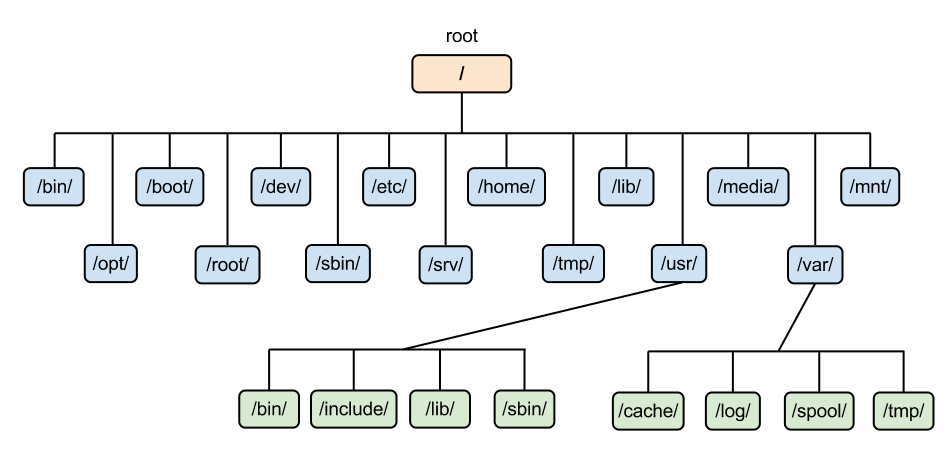

Il filesystem Linux "_inizia_" dalla directory chiamata ***root***, indicata dal simbolo "**/**". La root è la cartella madre di tutte le altre directories. Tutti i file e tutte le cartelle del sistema sono contenute in root. Partendo dalla root, possiamo indicare la posizione delle altre directory utilizzando un ***path***, o _percorso_. Esistono due tipi di path:

- Il ***path assoluto*** inizia **SEMPRE** dalla root. Ad esempio, il path assoluto per la directory "_sbin/_", contenuta in "_usr/_", che a sua volta è contenuta in "/", può essere scritto: _/usr/sbin/_. Il path assoluto ci consente di "localizzare" una directory a prescindere da dove ci troviamo all'interno del filesystem;

- Il ***path relativo*** descrive il percorso che bisogna seguire per arrivare al file o alla directory di interesse partendo dalla **posizione corrente**. Ai fini della nostra lezione e delle applicazioni che vedremo nel corso, la posizione corrente corrisponde alla directory nella quale si trova lo script in Python che vogliamo eseguire. Ricordiamo che la directory corrente si indica con il carattere "**.**", mentre per _salire di una posizione_ nel filesystem, ossia raggiugnere la directory madre della directory corrente, si utilizza il carattere "**..**". **Esempio**: supponiamo che la posizione corrente sia */var/* e di voler raggiungere la posizione */usr/sbin/*. Il path relativo sarà dunque *./../usr/sbin/*. Traducendo: "Dalla directory corrente ("."), passa alla cartella madre ("..", ossia "/"), entra nella cartella _usr/_ e poi nella cartella _sbin/_.

## I/O per file di testo

Passiamo ora all'azione e vediamo in che modo Python ci consente di accedere, leggere e scrivere file di testo. Affinché un file di testo possa essere letto, creato o modificato è necessario che questo venga prima **aperto**. L'apertura dei file è svolta utilizzando la funzione ***open("path_del_file", "modalità")*** . Per iniziare, apriamo il file di testo denominato _text.txt_, situato nella cartella _data_:

In [1]:
f = open('./data/text.txt', 'r')
print(f)

<_io.TextIOWrapper name='./data/text.txt' mode='r' encoding='UTF-8'>


Come possiamo vedere dall'output, la funzione _open()_ crea un oggetto **TextIOWrapper** che contiene una sorta di collegamento al file. Questo oggetto sarà contenuto nella nostra variabile **f**. Il primo argomento è il _path_ assoluto o relativo del file, mentre il secondo argomento è la modalità di apertura del file. Un file può essere aperto in 3 modalità diverse:

- **'r'** o _read_: il file viene aperto in modalità **lettura**. Un file aperto in questo modo può soltanto essere letto e non modificato. Costituisce la modalità più _sicura_ e quella che viene utilizzata di default se nessun parametro viene specificato per la modalità. Se il file non esiste la funzione ritorna un errore;

- **'w'** o _write_: il file viene aperto in modalità **scrittura**. Se il file non esiste viene creato, se il file esiste invece, il suo contenuto viene **eliminato** e qualsiasi modifica successiva consiste sostanzialmente in una sovrascrittura. Dato che non è possibile recuperare successivamente il contenuto del file così sovrascritto è bene utilizzare l'apertura in scrittura con cautela;

- **'a'** o _append_: il file viene aperto in modalità lettura SENZA eliminare il contenuto del file. Le modifiche apportate al file verranno scritte al termine dell'informazione già presente. È quindi possibile _aggiungere_ dell'informazione in fondo al file senza sovrascrivere nulla.

Una volta che abbiamo stabilito un collegamento al file, possiamo leggerlo riga per riga utilizzando il metodo ***read_line()***:

In [2]:
line1 = f.readline()
line2 = f.readline()
print(f'#####################Questa è la prima riga\n{line1}')
print(f'#####################Questa è la seconda riga\n{line2}')

#####################Questa è la prima riga
 Lorem ipsum dolor sit amet, consectetur adipiscing elit. Vivamus neque metus, posuere non dolor sed, faucibus viverra tortor. Fusce vulputate gravida mauris vel varius. Mauris tempor porttitor mattis. Aliquam facilisis scelerisque varius. Duis maximus eros in mollis imperdiet. Donec erat massa, semper sed facilisis sit amet, egestas a ipsum. Ut dolor urna, elementum non lacus eu, congue accumsan sapien. Cras sed ante lacinia, euismod risus sed, ultricies augue. Cras nibh purus, tempor in dignissim et, maximus at tellus. Aliquam risus augue, luctus at dictum eget, imperdiet ac lorem.

#####################Questa è la seconda riga
Proin egestas tellus sed ligula dapibus, id tempus augue scelerisque. Maecenas scelerisque et arcu a accumsan. Proin sed consequat urna, sed rhoncus mauris. Sed fringilla sem id elit egestas ornare. Maecenas condimentum, velit non fermentum interdum, quam massa vestibulum quam, sed aliquam ante eros ac eros. Mauris n

Il metodo _readline()_ legge una riga del file di testo ogni volta che viene chiamato. Dopo aver letto una riga la restituisce come stringa e ***sposta il puntatore*** alla riga successiva. Il processo si ripete finché non viene raggiunta la fine del file, denominata generalmente **EOF** (_End Of File_):

In [4]:
for i in range(15):
    line_piece = f.readline()[0:3]
    print(line_piece)
    print(type(line_piece))

Ves
<class 'str'>
Viv
<class 'str'>
Dui
<class 'str'>

<class 'str'>

<class 'str'>

<class 'str'>

<class 'str'>

<class 'str'>

<class 'str'>

<class 'str'>

<class 'str'>

<class 'str'>

<class 'str'>

<class 'str'>

<class 'str'>


Notiamo come al termine del file, il metodo _readline()_ non dia errore, ma si limiti a restituire delle stringhe vuote. Una volta terminate le operazioni sul file, questo deve essere chiuso. Per farlo utilizziamo il metodo ***close()***:

In [39]:
f.close()

>**NOTA**: il linguaggio Python, come la maggior parte dei linguaggi interpretati, possiede un **garbage collector**, ossia una funzionalità che libera la memoria da variabili non utilizzate e, tra le altre cose, chiude i file non più necessari. La chiusura automatica dei file avviene generalmente una volta che lo script che li ha aperti termina l'esecuzione. Per script che vengono eseguiti in locale, che non aprono molti file e che terminano le operazioni rapidamente, dimenticarsi di chiudere un file non costituisce generalmente un problema. Pensiamo però alla situazione in cui uno script resta in esecuzione per lungo tempo, magari su di un server e magari lanciato da numerosi utenti contemporaneamente. Se ciascuno di questi utenti apre molti file e nello script non viene implementata la loro chiusura al termine delle operazioni, si capisce come sia semplice arrivare ad un sovraccarico della memoria di sistema, che comporta generalmente il crash dell'applicazione. È quindi importante che i file vengano SEMPRE chiusi una volta che non sono più necessari.

Un modo più utilizzato per _scorrere_ un file aperto in lettura è quello di utilizzare un **ciclo _for_**. Il _wrapper_ dei file aperti in lettura si comporta infatti come un **iterabile** del quale ciascun elemento è rappresentato da una riga del file di testo. La sintassi generale è la seguente:

In [40]:
f = open('./data/text.txt', 'r')
for line in f:
    print(len(line))

591
610
850
661
509


Per compattezza, è stata stampata la lunghezza di ogni riga invece della riga intera. Scorrere le righe di un file con un ciclo _for_ ha un effetto simile a quello dell'utilizzo del metodo _readline()_. Se infatti proviamo a scorrere nuovamente il file, non otterremo nulla perché il **puntatore** è già stato spostato tra le righe successive del file fino ad arrivare alla fine:

In [41]:
for line in f:
    print(line)
f.close()

Come volevasi dimostrare, non otteniamo nulla in output, poiché il file è già stato letto fino alla fine e il puntatore si trova ora alla fine del file. Per leggere nuovamente le righe, dovremmo chiudere il file e riaprirlo.

Vediamo ora un applicazione pratica di quanto appreso fin'ora, provando ad estrarre una sequenza amminoacidica da un file _FASTA_. La prima riga di un file FASTA costituisce **l'header**: questo presenta informazioni generali sulla sequenza contenuta nel file ed inizia sempre con il simbolo '**>**'. Dalla riga successiva a quella dell'header, troviamo invece la sequenza vera e propria, generalmente distribuita su più righe, ciascuna costituita da 60 nucleotidi/aminoacidi.

Quello che faremo è quindi aprire il file FASTA, ignorare la riga dell'header ricordandoci che inizia con il carattere "_>_" per poi inserire l'intera sequenza in una variabile di tipo stringa:

In [42]:
#Apro il file FASTA

fasta_file = open('./data/lyz.fasta', 'r')

#Inizializzo una variabile "sequenza" come stringa vuota:
seq = ''

#Scorro le righe del file FASTA
for line in fasta_file:
    #Se la riga inizia con il simbolo '>', è l'header
    if line.startswith('>'):
        #stampo l'header
        print(f'Header found: {line}')
    else:
        #se la riga non inizia con '>' sarà parte della sequenza
        seq += line.strip()
print(seq)

#chiudo il file!
f.close()

Header found: >NP_000230.1 lysozyme C precursor [Homo sapiens]

MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANWMCLAKWESGYNTRATNYNAGDRSTDYGIFQINSRYWCNDGKTPGAVNACHLSCSALLQDNIADAVACAKRVVRDPQGIRAWVAWRNRCQNRDVRQYVQGCGV


## Il _Context Manager_ 

Ricordarsi ogni volta di chiudere i file aperti è un'operazione tediosa ed è facile dimenticarsene. Per questo motivo, non si utilizza quasi mai la sintassi che abbiamo utilizzato fin'ora per aprire un file. La gestione della chiusura del file viene affidata al **context manager**.

Come suggerisce il nome, il context manager è un costrutto sintattico che ci permette di utilizzare il file soltanto nel _contesto_ in cui è necessario. Sarà poi il context manager ad occuparsi della sua chiusura quanto le operazioni sul file saranno concluse. Il context manager è riconoscibile dalle _keywords_ ***with*** ed ***as*** e viene presentata di seguito: 

In [43]:
with open('./data/lyz.fasta', 'r') as f:
    print(f.readline())
try:
    print(f.readline())
except ValueError:
    print('Can\'t read line. The file has been closed')

>NP_000230.1 lysozyme C precursor [Homo sapiens]

Can't read line. The file has been closed


Come possiamo osservare dall'output, sebbene il file non sia stato chiuso "_manualmente_", il context manager ha provveduto alla sua chiusura al termine dell'esecuzione del blocco di codice.

## **Modulo OS**

**OS** è un modulo python che ci consente, tra le altre cose, di interagire con il _filesystem_ del nostro sistema operativo. Per brevità e praticità, in questa lezione affronteremo solo la creazione e la rimozione di directories. Per iniziare, importiamo il modulo OS e creiamo una cartella utilizzando la funzione _mkdir()_

In [1]:
import os
os.mkdir('./cartella')

E verifichiamo che la cartella sia stata effettivamente creata utilizzando la funzione _listdir()_

In [2]:
print(os.listdir())

['cartella', 'readme.md', 'lez_03.ipynb', 'lez_01.ipynb', 'data', '.gitignore', 'lez_02.ipynb', 'lez_07.ipynb', 'lez_06.ipynb', 'lez_05.ipynb', 'lez_04.ipynb', 'lez_00.ipynb', 'python_installazione.pdf', '.git', 'LICENSE', '.ipynb_checkpoints', '0_Introduzione.ipynb']


Come possiamo vedere dall'output, la funzione _listdir()_ restituisce una **lista** contenente i nomi di tutti i file e tutte le cartelle presenti all'interno della nostra **directory corrente**. Ricordiamo che la directory corrente, di default, è la cartella contenente lo script Python che stiamo eseguendo.

Proviamo ora a creare di nuovo la directory _cartella_ utilizzando nuovamente la funzione _mkdir()_

In [3]:
os.mkdir('cartella')

FileExistsError: [Errno 17] File exists: 'cartella'

Come possiamo vedere, cercare di creare una directory già esistente restituisce l'errore **FileExistsError**. In generale, quando vogliamo creare una nuova directory, dobbiamo prima assicurarsi che la cartella non esista già. Per farlo, possiamo utilizzare la funzione _os.path.isdir()_, che restituisce **True** se la cartella esiste, **False** se la cartella non esiste:

In [4]:
if os.path.isdir('./cartella'):
    print('La cartella esiste già')
else:
    os.mkdir('./cartella')

La cartella esiste già


Per concludere, possiamo rimuovere una cartella **VUOTA** con la funzione _rmdir()_

In [7]:
if os.path.isdir('./cartella'):
    os.rmdir('./cartella')
else:
    print('La cartella non esiste')

La cartella non esiste


# Esercizi:

1) Leggere il file _text.txt_ contenuto nella cartella _data/_ e contare il numero di parole presenti nel file. Assumere come parole tutte le serie di caratteri separate da uno spazio;

2) Stabilire il contenuto percentuale di Alanina della sequenza contenuta nel file _data/lyz.fasta_;

3) Leggere il file _data/multi.fasta_ e creare un dizionario così strutturato:
    {header1 : seq1, header2 : seq2, ..., headerN, seqN}

4) Utilizzando il dizionario così generato, creare per ciascuna sequenza un file _fasta_, con nome _header.fasta_. All'interno del file, il formato dovrà essere del tipo:

%>acc_number

ATCGATCGATCTACGCTACGCTA....

..

..

..

..

..

..

..

..

..

..

..

..

..

..

..

..

..

..

# Soluzioni

### Esercizio 1

In [12]:
n_parole = 0
with open('./data/text.txt', 'r') as file:
    for line in file:
        n_parole += len(line.split(' '))
print(f'Il file contiene {n_parole} parole')

Il file contiene 477 parole


### Esercizio 2

In [17]:
with open('data/lyz.fasta', 'r') as f:
    seq = ''
    for line in f:
        if line.startswith('>'):
            pass
        else:
            seq += line.strip()
print(seq)
ala_percent = seq.count('A') / len(seq)
print(ala_percent)

MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANWMCLAKWESGYNTRATNYNAGDRSTDYGIFQINSRYWCNDGKTPGAVNACHLSCSALLQDNIADAVACAKRVVRDPQGIRAWVAWRNRCQNRDVRQYVQGCGV
0.10135135135135136


### Esercizio 3

In [23]:
seq_dict = {}
seq = ''
acc_no = 'Rem'
with open('data/multi.fasta', 'r') as f:
    for line in f:
        if line.startswith('>'):
            seq_dict[acc_no] = seq
            acc_no = line.split(' ')[0][1:]
            seq = ''
        else:
            seq += line.strip()
seq_dict[acc_no] = seq
del seq_dict['Rem']
for accs in seq_dict:
    print(accs, seq_dict[accs], '\n')

MN450734.1 GCTATAGTTTCCATGGCATGTCGGCTACCGGGTAATGTGTCAACACCCGAAGAGCTTTGGAACCTATTGCAAAGTGGTAAAGACACAACTACCGACGTTCCTAAAGATCGCTGGGATGCTGGGAAATTATACCATCCGGATCCTAGCGTGGAAGGGAAGTCATACTGCAGCAGAGGGAGCTTCCTTGACTCTATCTACTCCTACGATGCGTCCTTCTTCGGCATTTCTCCGCGTGAGGCACAAGCAATGGATCCCGCGCAGCACCTGATGCTGGAGTTGGTCTGGGAAGGATTTGAAAGAGCCGGCTACACCAAGGACAAACTAAGCGGAAGTACTACGGGCGTTTTCGTTGGCGTTAGCAATAATGGAACTTCGACTGCTGTGCCACCAGATCTCAAGGGTCACTCTATCACAGGGAGTGCCAGTGCGACAATATCTGGTCGCCTATCGTATACCTTCAATCTACAAGGGCCATCCATGACAATTGATACAGCATGCTCGTCTTCCCTGGTGGCTACCCATTTGGCGTGTAATGCCCTGCGCCAGGGCGAATGCAATATGGCGTTGGCCGGCGGCATCAGTCTTCTTCTCACTCCGGGAATACATATAGAGTTTAGCAGACTTCGCGGTATTTCGCCTGATGGTCGGTGCAGAGCTTTCTCAGAGGACACAGAGGGAACAGGGTTTAGTGAGGGTGCCGCTATTGTACTTCTTAAACGTCTTTCGGATGCCGGGCCT 

MK404051.1 GGGGATTTTCTTTTGGGTGCGAGTGCCGCAGGCATCCGGTGCCTCGTCTGAGCGCTCAGCCAGCCTTCTGGCTTATCGCGAGGAGGGGCAATTTGGATGGTGGGGTTGTGCCGACTTTTTCGCGCCAGCGCTAGGCCCGATCTGGGTCTCGCCAACAACAACACCACGACGCACATCCGCATTTCTCGCTTCATTGCGAGCGCGCTTTTCCACAATTTCATGATGCTAACACACTCC

### Esercizio 4

In [25]:
for accs in seq_dict:
    with open(f'./data/{accs}.fasta', 'w') as f:
        f.write(f'>{accs}\n{seq_dict[accs]}')
os.listdir('./data')

['biostats.csv',
 'MN450734.1.fasta',
 'lyz.fasta',
 'text.txt',
 'MK404050.1.fasta',
 'MK404051.1.fasta',
 'multi.fasta']